In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.offline as py 

# Feature Engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Data Visualization

In [2]:
X_train = pd.read_csv(r"C:\Users\LENOVO\Downloads\career-con-2019\X_train.csv")
y_train = pd.read_csv(r"C:\Users\LENOVO\Downloads\career-con-2019\y_train.csv")
X_test = pd.read_csv(r"C:\Users\LENOVO\Downloads\career-con-2019\X_test.csv")

In [3]:
X_train.head()

row_id  series_id  measurement_number  orientation_X  orientation_Y  \
0    0_0          0                   0       -0.75853       -0.63435   
1    0_1          0                   1       -0.75853       -0.63434   
2    0_2          0                   2       -0.75853       -0.63435   
3    0_3          0                   3       -0.75852       -0.63436   
4    0_4          0                   4       -0.75852       -0.63435   

   orientation_Z  orientation_W  angular_velocity_X  angular_velocity_Y  \
0       -0.10488       -0.10597            0.107650            0.017561   
1       -0.10490       -0.10600            0.067851            0.029939   
2       -0.10492       -0.10597            0.007275            0.028934   
3       -0.10495       -0.10597           -0.013053            0.019448   
4       -0.10495       -0.10596            0.005135            0.007652   

   angular_velocity_Z  linear_acceleration_X  linear_acceleration_Y  \
0            0.000767               -0.74857                 2.1030   
1            0.003385                0.33995                 1.5064   
2           -0.005978               -0.26429                 1.5922   
3           -0.008974                0.42684                 1.0993   
4            0.005245               -0.50969                 1.4689   

   linear_acceleration_Z  
0                -9.7532  
1                -9.4128  
2                -8.7267  
3               -10.0960  
4               -10.4410

In [4]:
y_train.head()

series_id  group_id        surface
0          0        13  fine_concrete
1          1        31       concrete
2          2        20       concrete
3          3        31       concrete
4          4        22     soft_tiles

In [5]:
X_test.head()

row_id  series_id  measurement_number  orientation_X  orientation_Y  \
0    0_0          0                   0        0.91208       -0.38193   
1    0_1          0                   1        0.91220       -0.38165   
2    0_2          0                   2        0.91228       -0.38143   
3    0_3          0                   3        0.91237       -0.38121   
4    0_4          0                   4        0.91247       -0.38096   

   orientation_Z  orientation_W  angular_velocity_X  angular_velocity_Y  \
0      -0.050618        0.14028           -0.060205            0.071286   
1      -0.050573        0.14028           -0.033486            0.060210   
2      -0.050586        0.14032           -0.029686            0.029476   
3      -0.050588        0.14035           -0.024217            0.037788   
4      -0.050546        0.14042           -0.038047            0.083405   

   angular_velocity_Z  linear_acceleration_X  linear_acceleration_Y  \
0            -0.18787                0.29492                 2.8027   
1            -0.18206                0.14944                 2.5408   
2            -0.18441               -0.49741                 2.5853   
3            -0.18783               -0.32376                 2.9966   
4            -0.20170               -0.70103                 2.6498   

   linear_acceleration_Z  
0                -9.6816  
1                -9.8521  
2                -9.3835  
3                -8.7415  
4                -8.8432

In [6]:
X_train.isnull().any()

row_id                   False
series_id                False
measurement_number       False
orientation_X            False
orientation_Y            False
orientation_Z            False
orientation_W            False
angular_velocity_X       False
angular_velocity_Y       False
angular_velocity_Z       False
linear_acceleration_X    False
linear_acceleration_Y    False
linear_acceleration_Z    False
dtype: bool

In [7]:
y_train.isnull().any()

series_id    False
group_id     False
surface      False
dtype: bool

In [8]:
X_test.isnull().any()

row_id                   False
series_id                False
measurement_number       False
orientation_X            False
orientation_Y            False
orientation_Z            False
orientation_W            False
angular_velocity_X       False
angular_velocity_Y       False
angular_velocity_Z       False
linear_acceleration_X    False
linear_acceleration_Y    False
linear_acceleration_Z    False
dtype: bool

In [9]:
y_train.surface.value_counts()

concrete                  779
soft_pvc                  732
wood                      607
tiled                     514
fine_concrete             363
hard_tiles_large_space    308
soft_tiles                297
carpet                    189
hard_tiles                 21
Name: surface, dtype: int64

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 <a list of 10 Text yticklabel objects>)

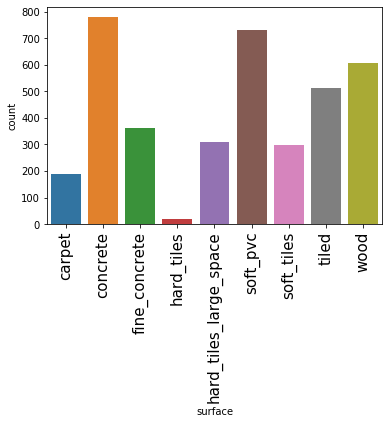

In [10]:
sns.countplot(y_train.surface.sort_values())
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=10)

In [11]:
pie = go.Pie(
    labels = y_train['surface'].value_counts().index,
    values = y_train['surface'].value_counts().values,
    )

data = pie
layout = go.Layout(
    title = 'Frequency Distribution for surface/target data',
    )

fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

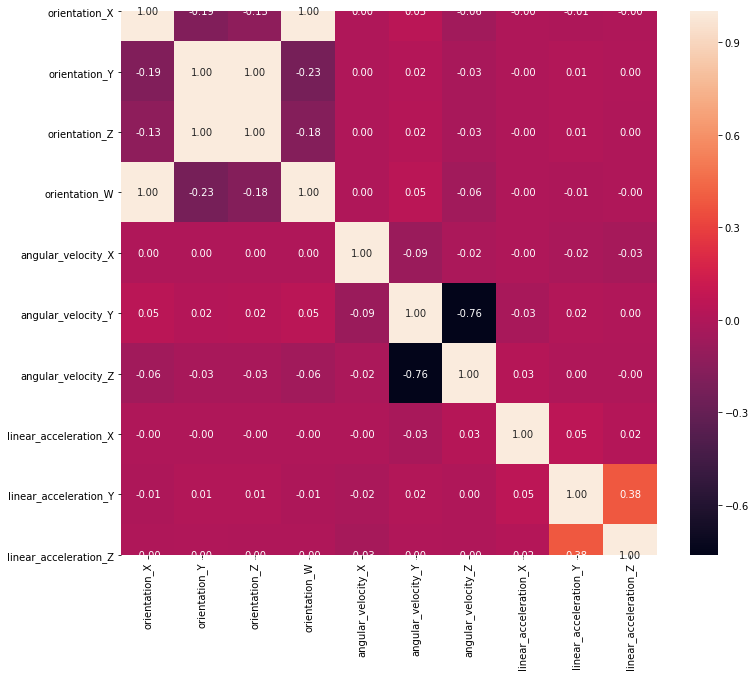

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(X_train.iloc[:, 3:].corr(), annot = True, fmt = ".2f")

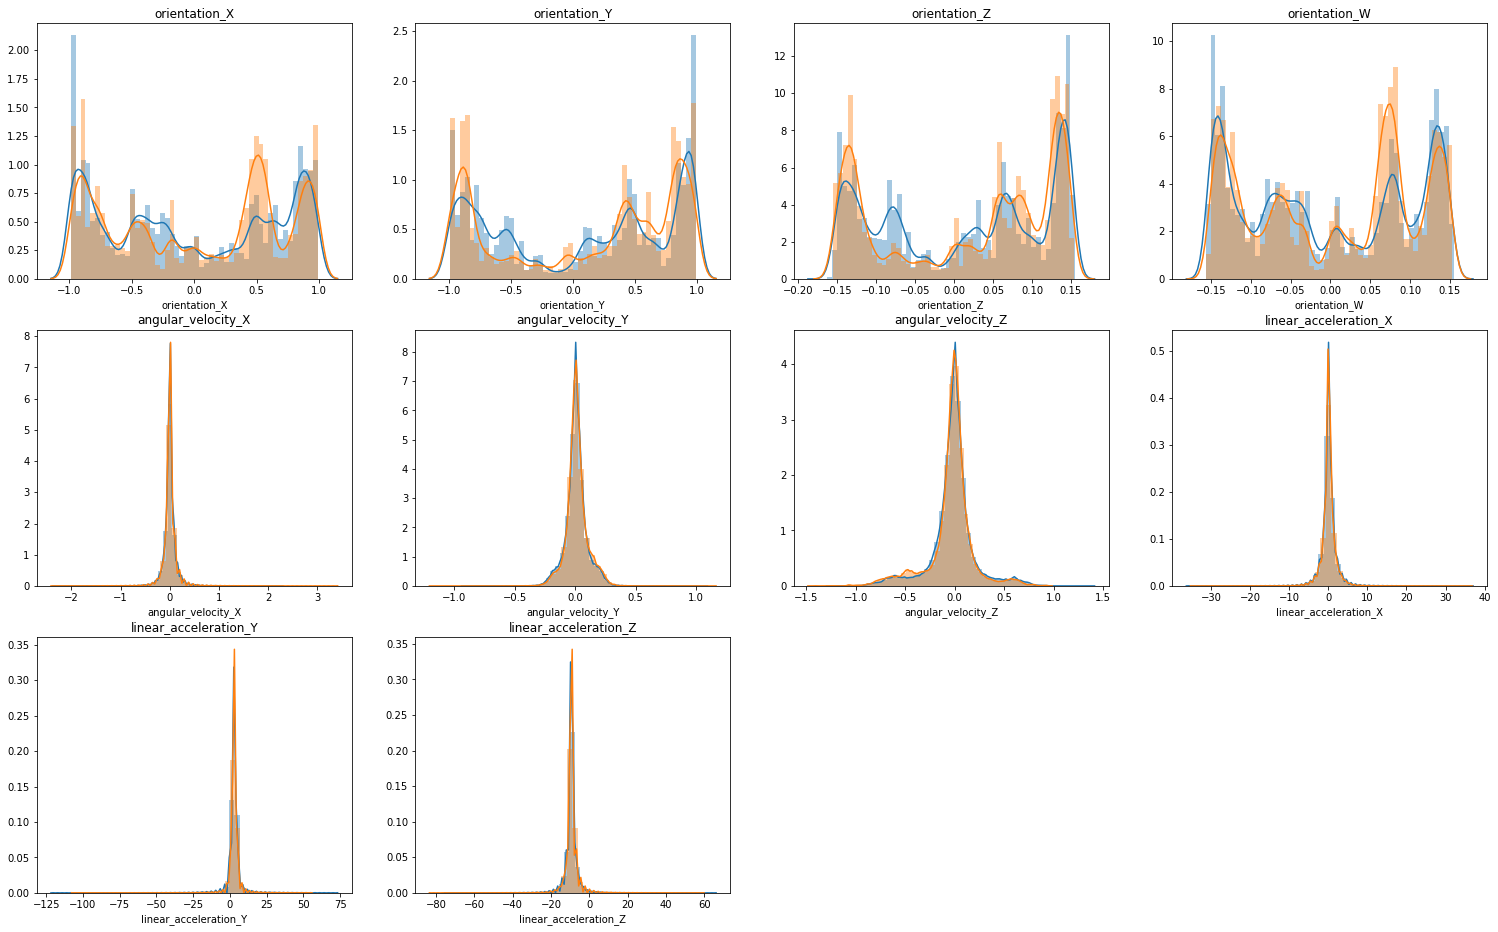

In [13]:
# Verificando a forma da distribuição
plt.figure(figsize=(26, 16))
for i, col in enumerate(X_train.columns[3:]):
    plt.subplot(3, 4, i + 1)
    sns.distplot(X_train[col])
    sns.distplot(X_test[col])
    plt.title(col)

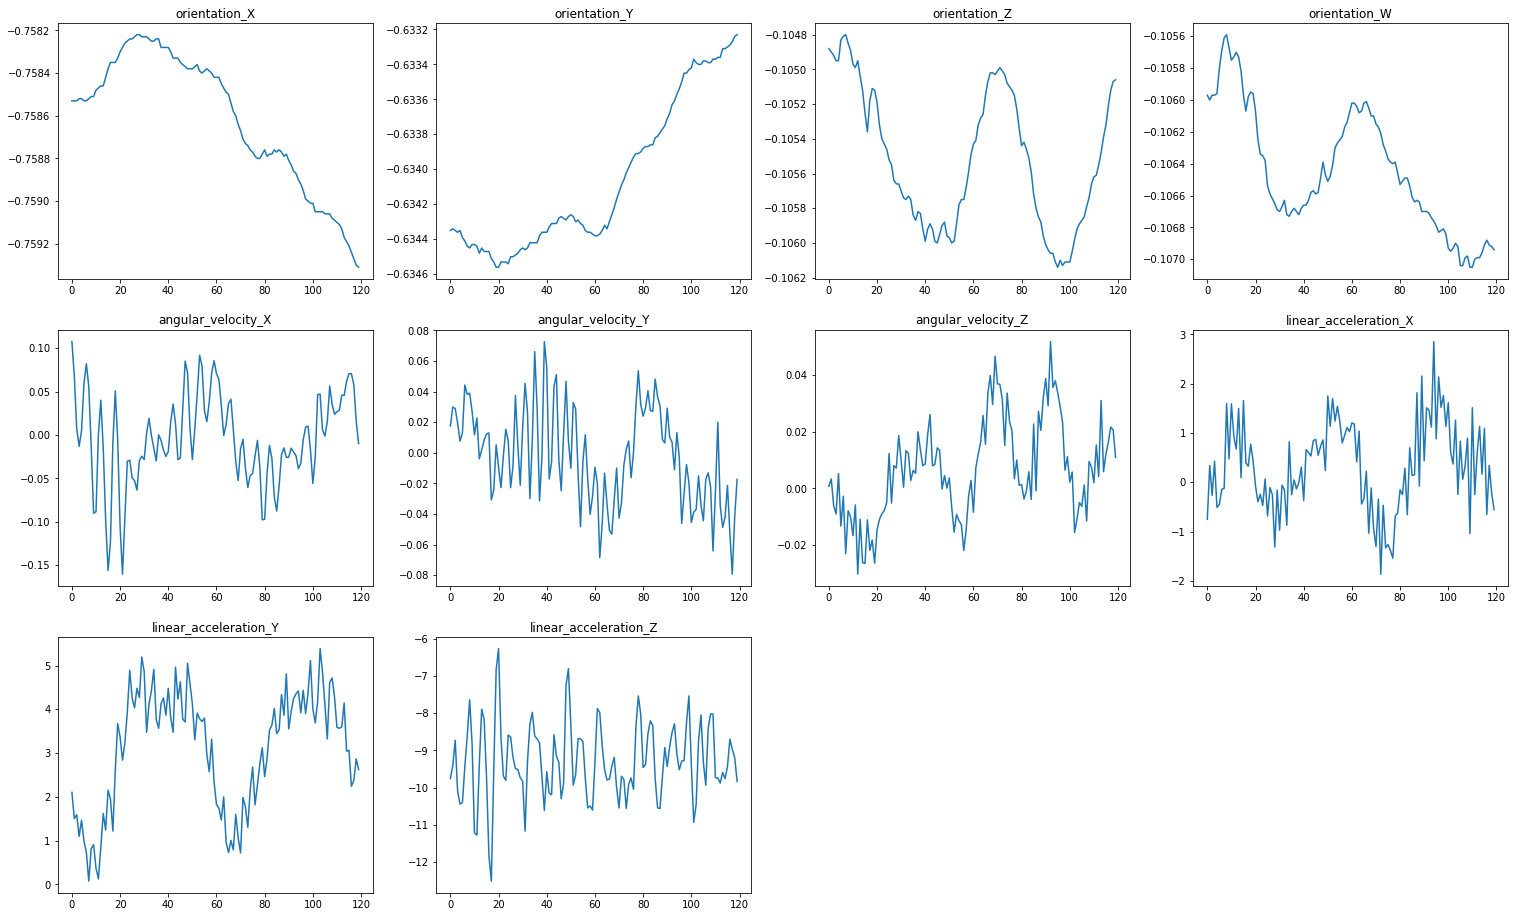

In [14]:
# Verificando a forma da distribuição
plt.figure(figsize=(26, 16))
series = X_train.head(120)
for i, col in enumerate(series.columns[3:]):
    plt.subplot(3, 4, i + 1)
    plt.plot(series[col])
    plt.title(col)

In [15]:
def quaternion_to_euler(x, y, z, w):
    import math
    t0 = +2.0 * (w * x + y * z)
    t1 = +1.0 - 2.0 * (x * x + y * y)
    X = math.atan2(t0, t1)

    t2 = +2.0 * (w * y - z * x)
    t2 = +1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    Y = math.asin(t2)

    t3 = +2.0 * (w * z + x * y)
    t4 = +1.0 - 2.0 * (y * y + z * z)
    Z = math.atan2(t3, t4)

    return X, Y, Z

In [16]:
def feat_eng01(df):
    """Quaternions to Euler Angles"""
    
    x, y, z, w = df['orientation_X'].tolist(), df['orientation_Y'].tolist(), df['orientation_Z'].tolist(), df['orientation_W'].tolist()
    nx, ny, nz = [], [], []
    for i in range(len(x)):
        xx, yy, zz = quaternion_to_euler(x[i], y[i], z[i], w[i])
        nx.append(xx)
        ny.append(yy)
        nz.append(zz)
    
    df['euler_x'] = nx
    df['euler_y'] = ny
    df['euler_z'] = nz
    return df


In [17]:
X_train = feat_eng01(X_train)
X_test = feat_eng01(X_test)
print(X_train.shape, X_test.shape)

(487680, 16) (488448, 16)


In [18]:
X_train.head()

row_id  series_id  measurement_number  orientation_X  orientation_Y  \
0    0_0          0                   0       -0.75853       -0.63435   
1    0_1          0                   1       -0.75853       -0.63434   
2    0_2          0                   2       -0.75853       -0.63435   
3    0_3          0                   3       -0.75852       -0.63436   
4    0_4          0                   4       -0.75852       -0.63435   

   orientation_Z  orientation_W  angular_velocity_X  angular_velocity_Y  \
0       -0.10488       -0.10597            0.107650            0.017561   
1       -0.10490       -0.10600            0.067851            0.029939   
2       -0.10492       -0.10597            0.007275            0.028934   
3       -0.10495       -0.10597           -0.013053            0.019448   
4       -0.10495       -0.10596            0.005135            0.007652   

   angular_velocity_Z  linear_acceleration_X  linear_acceleration_Y  \
0            0.000767               -0.74857                 2.1030   
1            0.003385                0.33995                 1.5064   
2           -0.005978               -0.26429                 1.5922   
3           -0.008974                0.42684                 1.0993   
4            0.005245               -0.50969                 1.4689   

   linear_acceleration_Z   euler_x   euler_y   euler_z  
0                -9.7532  2.843272 -0.024668  1.396664  
1                -9.4128  2.843199 -0.024662  1.396646  
2                -8.7267  2.843224 -0.024728  1.396682  
3               -10.0960  2.843186 -0.024770  1.396721  
4               -10.4410  2.843195 -0.024784  1.396693

In [19]:
def feat_eng02(df):
    df['total_angular_vel'] = ((df['angular_velocity_X']**2) + (df['angular_velocity_Y']**2)
                               + (df['angular_velocity_Z']**2))**0.5
    df['total_linear_accel'] = ((df['linear_acceleration_X']**2) + (df['linear_acceleration_Y']**2)
                               + (df['linear_acceleration_Z']**2))**0.5
    df['total_orientation'] = ((df['orientation_X']**2) + (df['orientation_Y']**2)
                              + (df['orientation_Z']**2))**0.5
    df['total_angle'] = (df['euler_x'] ** 2 + df['euler_y'] ** 2 + df['euler_z'] ** 2) ** 5
    df['accel_vs_vel'] = df['total_linear_accel']/df['total_angular_vel']
    df['angle_vs_accel'] = df['total_angle']/df['total_linear_accel']
    df['angle_vs_vel'] = df['total_angle']/df['total_angular_vel']
    
    return df

In [20]:
X_train = feat_eng02(X_train)
X_test = feat_eng02(X_test)
print(X_train.shape, X_test.shape)

(487680, 23) (488448, 23)


In [21]:
X_train.head()

row_id  series_id  measurement_number  orientation_X  orientation_Y  \
0    0_0          0                   0       -0.75853       -0.63435   
1    0_1          0                   1       -0.75853       -0.63434   
2    0_2          0                   2       -0.75853       -0.63435   
3    0_3          0                   3       -0.75852       -0.63436   
4    0_4          0                   4       -0.75852       -0.63435   

   orientation_Z  orientation_W  angular_velocity_X  angular_velocity_Y  \
0       -0.10488       -0.10597            0.107650            0.017561   
1       -0.10490       -0.10600            0.067851            0.029939   
2       -0.10492       -0.10597            0.007275            0.028934   
3       -0.10495       -0.10597           -0.013053            0.019448   
4       -0.10495       -0.10596            0.005135            0.007652   

   angular_velocity_Z  ...   euler_x   euler_y   euler_z  total_angular_vel  \
0            0.000767  ...  2.843272 -0.024668  1.396664           0.109076   
1            0.003385  ...  2.843199 -0.024662  1.396646           0.074240   
2           -0.005978  ...  2.843224 -0.024728  1.396682           0.030428   
3           -0.008974  ...  2.843186 -0.024770  1.396721           0.025082   
4            0.005245  ...  2.843195 -0.024784  1.396693           0.010603   

   total_linear_accel  total_orientation    total_angle  accel_vs_vel  \
0           10.005392           0.994368  101786.439584     91.728917   
1            9.538638           0.994364  101762.825702    128.483970   
2            8.874697           0.994372  101775.150148    291.666195   
3           10.164638           0.994374  101769.860623    405.249042   
4           10.556132           0.994368  101768.542343    995.561076   

   angle_vs_accel  angle_vs_vel  
0    10173.158225  9.331728e+05  
1    10668.486213  1.370729e+06  
2    11468.014364  3.344832e+06  
3    10012.147904  4.057413e+06  
4     9640.703441  9.597909e+06  

[5 rows x 23 columns]

In [22]:
def feat_eng03(data):
    df = pd.DataFrame()
    
    for col in data.columns:
        if col in ['row_id','series_id','measurement_number']:
            continue
        df[col + '_mean'] = data.groupby(['series_id'])[col].mean()
        df[col + '_median'] = data.groupby(['series_id'])[col].median()
        df[col + '_max'] = data.groupby(['series_id'])[col].max()
        df[col + '_min'] = data.groupby(['series_id'])[col].min()
        df[col + '_std'] = data.groupby(['series_id'])[col].std()
        df[col + '_range'] = df[col + '_max'] - df[col + '_min']
        df[col + '_maxtoMin'] = df[col + '_max'] / df[col + '_min']
        #in statistics, the median absolute deviation (MAD) is a robust measure of the variablility of a univariate sample of quantitative data.
        df[col + '_mad'] = data.groupby(['series_id'])[col].apply(lambda x: np.median(np.abs(np.diff(x))))
        df[col + '_abs_max'] = data.groupby(['series_id'])[col].apply(lambda x: np.max(np.abs(x)))
        df[col + '_abs_min'] = data.groupby(['series_id'])[col].apply(lambda x: np.min(np.abs(x)))
        df[col + '_abs_avg'] = (df[col + '_abs_min'] + df[col + '_abs_max'])/2
    return df

In [23]:
%%time
X_train = feat_eng03(X_train)
X_test = feat_eng03(X_test)
print(X_train.shape, X_test.shape, y_train.shape)

(3810, 220) (3816, 220) (3810, 3)
Wall time: 2min 53s


In [24]:
encoder = LabelEncoder()
y_train.surface = encoder.fit_transform(y_train.surface)

In [25]:
y_train.head()

series_id  group_id  surface
0          0        13        2
1          1        31        1
2          2        20        1
3          3        31        1
4          4        22        6

In [28]:
sc = StandardScaler()
train = sc.fit_transform(X_train.iloc[:,3:])
test = sc.fit_transform(X_test.iloc[:,3:])

In [29]:
# Importando as bibliotecas para cada modelo 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# criando uma lista com todos os modelos
classifiers = [
    KNeighborsClassifier(3),
    GaussianNB(),
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
    RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0),
    ]


In [30]:
# Importando as bibliotecas para Validação cruzada
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [31]:
# Definindo a validação cruzada
kf = StratifiedKFold(n_splits=10)

In [33]:
# Rodando todos os modelos classificadores na validação cruzada
for clf in classifiers:
    score = cross_val_score(clf, train, y_train['surface'], cv=kf, scoring='accuracy')
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    print(np.mean(score).round(3))

KNeighborsClassifier
0.848
GaussianNB
0.456


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\LENOVO\Anaconda3\lib\site-packa

LogisticRegression
0.695
SVC
0.82
DecisionTreeClassifier
0.797
RandomForestClassifier
0.904


In [36]:
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=60)
predicted = np.zeros((X_test.shape[0],9))
measured= np.zeros((X_train.shape[0]))/
score = 0

-------------------- 0 --------------------
score  0.9081364829396326


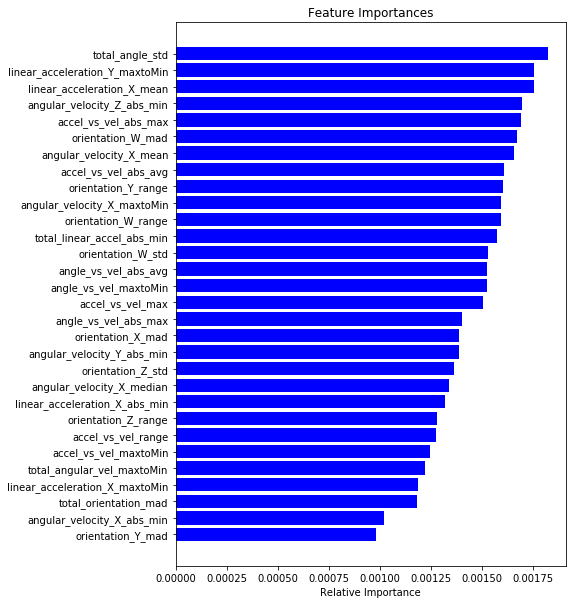

-------------------- 1 --------------------
score  0.9186351706036745


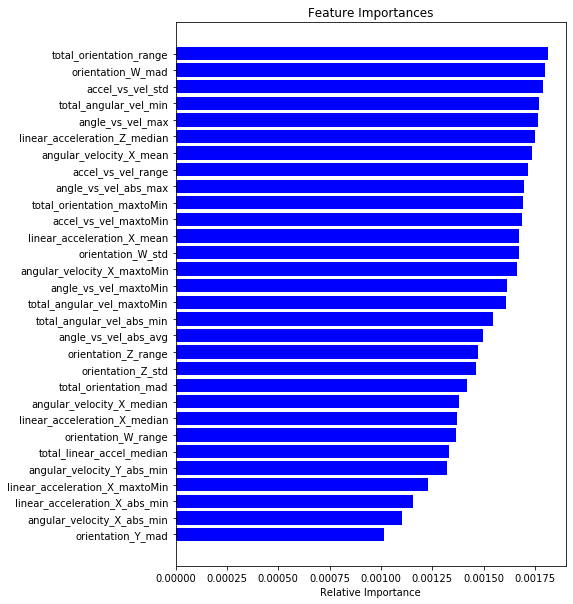

-------------------- 2 --------------------
score  0.905511811023622


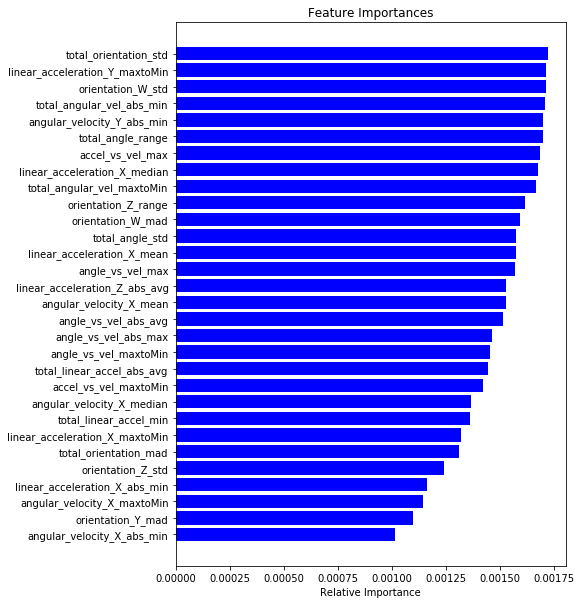

-------------------- 3 --------------------
score  0.89501312335958


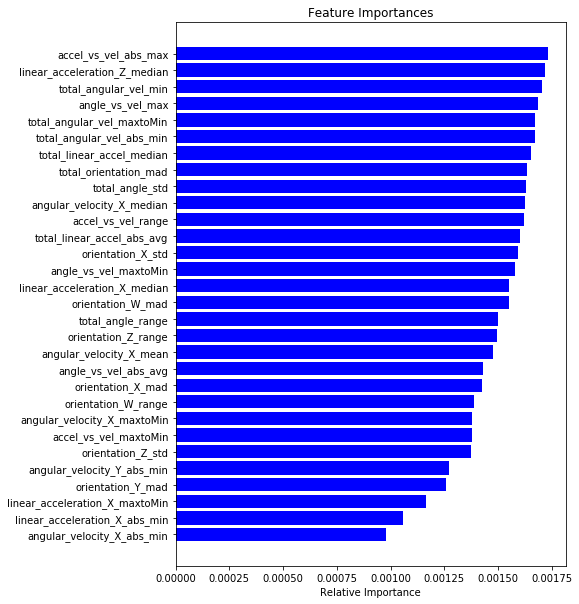

-------------------- 4 --------------------
score  0.9173228346456693


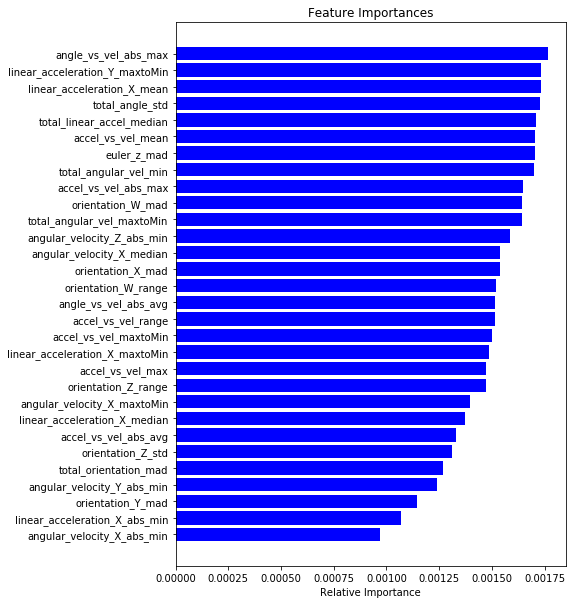

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=546789)
sub_preds_rf = np.zeros((X_test.shape[0], 9))
oof_preds_rf = np.zeros((X_train.shape[0]))
score = 0
for i, (train_index, test_index) in enumerate(folds.split(X_train, y_train['surface'])):
    print('-'*20, i, '-'*20)
    
    clf =  RandomForestClassifier(n_estimators = 200, n_jobs = -1)
    clf.fit(X_train.iloc[train_index], y_train['surface'][train_index])
    oof_preds_rf[test_index] = clf.predict(X_train.iloc[test_index])
    sub_preds_rf += clf.predict_proba(X_test) / folds.n_splits
    score += clf.score(X_train.iloc[test_index], y_train['surface'][test_index])
    print('score ', clf.score(X_train.iloc[test_index], y_train['surface'][test_index]))
    importances = clf.feature_importances_
    indices = np.argsort(importances)
    features = X_train.columns

    hm = 30
    plt.figure(figsize=(7, 10))
    plt.title('Feature Importances')
    plt.barh(range(len(indices[:hm])), importances[indices][:hm], color='b', align='center')
    plt.yticks(range(len(indices[:hm])), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()